<a href="https://colab.research.google.com/github/nathanhill923/DATA301-Lab-1A/blob/main/Copy_of_DATA_301_Lab_1A_Nathan_Hill.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# The Distribution of First Digits

In this lab, you will explore the distribution of first digits in real data. For example, the first digits of the numbers 52, 30.8, and 0.07 are 5, 3, and 7 respectively. In this lab, you will investigate the question: how frequently does each digit 1-9 appear as the first digit of the number?

## Question 0

Make a prediction. 

1. Approximately what percentage of the values do you think will have a _first_ digit of 1? What percentage of the values do you think will have a first digit of 9?
2. Approximately what percentage of the values do you think will have a _last_ digit of 1? What percentage of the values do you think will have a last digit of 9?

(Don't worry about being wrong. You will earn full credit for any justified answer.)

**It seems logical to suspect that each of the digits 1-9 are equally likely to appear as the first digit of a number, so I would predict 11.11% of the values would have a first digit of 1 and 11.11% of values would have a first digit of 9.**

**Similarly, digits should be equally likely to be the last one in the number, the only difference is that numbers can end with a 0 now, so I would predict that 10% of values would have a last digit of 1 and 10% of values would have a last digit of 9.**

## Question 1

The [S&P 500](https://en.wikipedia.org/wiki/S%26P_500_Index) is a stock index based on the market capitalizations of large companies that are publicly traded on the NYSE or NASDAQ. The CSV file (https://dlsun.github.io/pods/data/sp500.csv) contains data from February 1, 2018 about the stocks that comprise the S&P 500. We will investigate the first digit distributions of the variables in this data set.

Read in the S&P 500 data. What is the unit of observation in this data set? Is there a variable that is natural to use as the index? If so, set that variable to be the index. Once you are done, display the `DataFrame`.

In [1]:
import pandas as pd


In [2]:
data_dir = "https://dlsun.github.io/pods/data/"
df_sp500 = pd.read_csv(data_dir + "sp500.csv")
df_sp500.head()

,date,Name,open,close,volume
0,2018-02-01,AAL,$54.00,$53.88,3623078
1,2018-02-01,AAPL,$167.16,$167.78,47230787
2,2018-02-01,AAP,$116.24,$117.29,760629
3,2018-02-01,ABBV,$112.24,$116.34,9943452
4,2018-02-01,ABC,$97.74,$99.29,2786798


**The unit of observation for this data set are the large companies within the S&P 500. The name variable is natural to use as the index, since each one is unique to that observation.**

In [3]:
df_sp500 = df_sp500.set_index(["Name"])
df_sp500

,date,open,close,volume
Name,,,,
AAL,2018-02-01,$54.00,$53.88,3623078
AAPL,2018-02-01,$167.16,$167.78,47230787
AAP,2018-02-01,$116.24,$117.29,760629
ABBV,2018-02-01,$112.24,$116.34,9943452
ABC,2018-02-01,$97.74,$99.29,2786798
...,...,...,...,...
XYL,2018-02-01,$72.50,$74.84,1817612
YUM,2018-02-01,$84.24,$83.98,1685275
ZBH,2018-02-01,$126.35,$128.19,1756300


## Question 2

We will start by looking at the `volume` column. This variable tells us how many shares were traded on that date.

Extract the first digit of every value in this column. (_Hint:_ First, turn the numbers into strings. Then, use the [text processing functionalities](https://pandas.pydata.org/pandas-docs/stable/text.html) of `pandas` to extract the first character of each string.) Make an appropriate visualization to display the distribution of the first digits. (_Hint:_ Think carefully about whether the variable you are plotting is quantitative or categorical.)

How does this compare with what you predicted in Question 0?

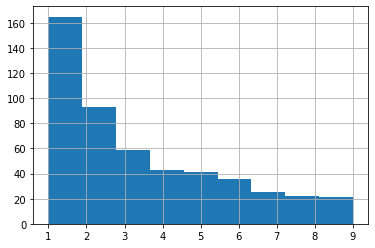

In [4]:
df_sp500["volume"]
df_sp500["volume"] = df_sp500["volume"].astype(str)
first = df_sp500["volume"].str[0].astype(int)
first.hist(bins = 9)

**This histogram does not match the prediction that I made, since it clearly shows the highest frequency results are the lower integers, with one being the highest and nine being the least common.**

## Question 3

Now, repeat Question 2, but for the distribution of _last_ digits. Again, make an appropriate visualization and compare with your prediction in Question 0.

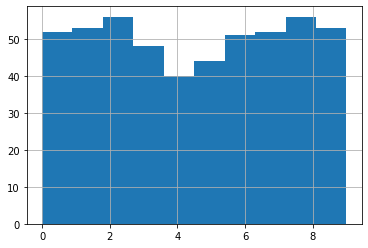

In [5]:
df_sp500["volume"]
df_sp500["volume"] = df_sp500["volume"].astype(str)
first = df_sp500["volume"].str[-1].astype(int)
first.hist(bins = 10)

**The plot of last digits seems much more uniformly distributed than the beginning digits, making it line up with my prediction better. However, there are less of the middle numbers such as 3, 4, 5, and 6 than one would expect from a uniform distribution, making it appear more bimodal.**

## Question 4

Maybe the `volume` column was just a fluke. Let's see if the first digit distribution holds up when we look at a very different variable: the closing price of the stock. Make a visualization of the first digit distribution of the closing price (the `close` column of the `DataFrame`). Comment on what you see.

(_Hint:_ What type did `pandas` infer this variable as and why? You will have to first clean the values using the [text processing functionalities](https://pandas.pydata.org/pandas-docs/stable/text.html) of `pandas` and then convert this variable to a quantitative variable.)

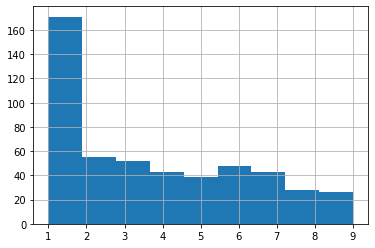

In [7]:
df_sp500["close"]
df_sp500["close"] = df_sp500["close"].astype(str)
first_close = df_sp500["close"].str[1].astype(int)
# index 1 because the first character in "close" is always a $
first_close.hist(bins = 9)

**This histogram supports the findings of the data in the volume column, since 1 has the highest frequency and 9 has the loweset. It is worth noting that this time, two of the succeeding columns are larger than a previous one, but these columns are still very close and do not take away from the overall pattern.**